# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 2/18/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 2/18/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,326,38928341,0.8
Albania,14845,2877800,515.8
Algeria,3037,43851043,6.9
Andorra,473,77265,612.2
Angola,456,32866268,1.4
Antigua and Barbuda,280,97928,285.9
Argentina,85160,45195777,188.4
Armenia,2252,2963234,76.0
Australia,76,25459700,0.3


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Montenegro,7025,628062,1118.5
Czechia,109900,10708982,1026.2
Seychelles,991,98340,1007.7
San Marino,309,33938,910.5
Israel,66316,8655541,766.2
Estonia,8961,1326539,675.5
Andorra,473,77265,612.2
Monaco,239,39244,609.0
Bahrain,10209,1701583,600.0


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

2/14/21    2341744.0
2/15/21    2346876.0
2/16/21    2352766.0
2/17/21    2362364.0
2/18/21    2372209.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

2/5/21        NaN
2/6/21     8632.0
2/7/21     6670.0
2/8/21     4650.0
2/9/21     5728.0
2/10/21    9246.0
2/11/21    9928.0
2/12/21    9197.0
2/13/21    6484.0
2/14/21    4838.0
2/15/21    5132.0
2/16/21    5890.0
2/17/21    9598.0
2/18/21    9845.0
Name: Germany, dtype: float64

<AxesSubplot:>

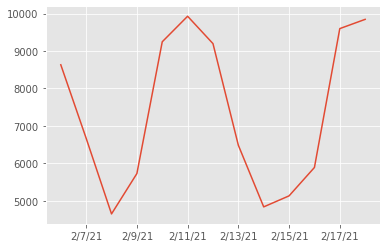

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

114.3870702197181